# Task 3.0.1 – Recap: Initiation

Face recognition systems are built on the idea that each person has a particular face structure, and using the facial symmetry, computerized face-matching is possible. 

The work on face recognition has begun in the 1960's, the results of which are being used for security in various institutions and firms throughout the world. 

The images must be processed correctly for computer based face recognition. The face and its structural properties should be identified carefully, and the resulting image must be converted to two dimensional digital data.

![Img](./data/face_recognition.png)

For this task we use the dataset [Labeled Faces in the Wild](http://vis-www.cs.umass.edu/lfw/) which contains more than 13,000 images of faces collected from the web. Each face has been labeled with the name of the person pictured.



#### Loading the Data (Labeled Faces in the Wild Dataset)
The lfw_people dataset is also one of datasets scikit-learn comes with that do not require the downloading of any file from some external website. The code below will load the dataset.

In [1]:
from sklearn.datasets import fetch_lfw_people

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

lfw_people.data

array([[254.      , 254.      , 251.66667 , ...,  87.333336,  88.666664,
         86.666664],
       [ 39.666668,  50.333332,  47.      , ..., 117.666664, 115.      ,
        133.66667 ],
       [ 89.333336, 104.      , 126.      , ..., 175.33333 , 183.33333 ,
        183.      ],
       ...,
       [ 86.      ,  80.333336,  74.666664, ...,  44.      ,  49.666668,
         44.666668],
       [ 50.333332,  65.666664,  88.      , ..., 197.      , 179.33333 ,
        166.33333 ],
       [ 30.      ,  27.      ,  32.666668, ...,  35.      ,  35.333332,
         61.      ]], dtype=float32)

But it's really large, so just use this csv file containing a dump.

In [2]:
import pandas as pd

df = pd.read_csv('./data/lfw_people.csv', index_col = 0)

### Task 3.0.1-1:  Explore data

**Note: each image has a height of 50 and a width of 37.**

1. Explore the dataset.
* Transform the target column to a numeric feature.
* Try to plot an image from the dataset. *Note: see Task 2.3 (Exercise 2)*

In [3]:
df.shape

(1288, 1851)

In [4]:
50 * 37

1850

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1841,1842,1843,1844,1845,1846,1847,1848,1849,target
0,254.000000,254.000000,251.666670,240.333330,185.333330,144.000000,174.00000,196.66667,196.00000,192.333330,...,100.000000,99.000000,95.666664,92.333336,90.666664,89.666664,87.333336,88.666664,86.666664,Hugo Chavez
1,39.666668,50.333332,47.000000,54.666668,99.000000,120.666664,139.66667,157.66667,171.00000,177.666670,...,59.666668,73.333336,77.666664,83.666664,103.333336,123.000000,117.666664,115.000000,133.666670,Tony Blair
2,89.333336,104.000000,126.000000,141.333330,152.000000,155.333330,155.33333,160.00000,163.00000,166.666670,...,111.666664,100.333336,106.666664,125.000000,117.666664,125.000000,175.333330,183.333330,183.000000,George W Bush
3,16.666666,7.666666,7.000000,6.000000,16.333334,70.000000,170.00000,169.66667,161.00000,106.333336,...,190.000000,230.000000,238.000000,239.333330,233.666670,134.000000,27.666666,38.000000,51.333332,Colin Powell
4,122.666664,121.000000,126.666664,129.333330,129.333330,134.666670,142.00000,142.66667,147.33333,152.000000,...,17.666666,6.666666,5.666666,5.666666,10.333333,10.666667,22.000000,61.666668,70.666664,Ariel Sharon


In [6]:
df['target'] = df['target'].astype('category')

df['target'].head()

0      Hugo Chavez
1       Tony Blair
2    George W Bush
3     Colin Powell
4     Ariel Sharon
Name: target, dtype: category
Categories (7, object): [Ariel Sharon, Colin Powell, Donald Rumsfeld, George W Bush, Gerhard Schroeder, Hugo Chavez, Tony Blair]

In [7]:
df['num_target'] = df['target'].cat.codes

df.head()

,0,1,2,3,4,5,6,7,8,9,...,1842,1843,1844,1845,1846,1847,1848,1849,target,num_target
0,254.000000,254.000000,251.666670,240.333330,185.333330,144.000000,174.00000,196.66667,196.00000,192.333330,...,99.000000,95.666664,92.333336,90.666664,89.666664,87.333336,88.666664,86.666664,Hugo Chavez,5
1,39.666668,50.333332,47.000000,54.666668,99.000000,120.666664,139.66667,157.66667,171.00000,177.666670,...,73.333336,77.666664,83.666664,103.333336,123.000000,117.666664,115.000000,133.666670,Tony Blair,6
2,89.333336,104.000000,126.000000,141.333330,152.000000,155.333330,155.33333,160.00000,163.00000,166.666670,...,100.333336,106.666664,125.000000,117.666664,125.000000,175.333330,183.333330,183.000000,George W Bush,3
3,16.666666,7.666666,7.000000,6.000000,16.333334,70.000000,170.00000,169.66667,161.00000,106.333336,...,230.000000,238.000000,239.333330,233.666670,134.000000,27.666666,38.000000,51.333332,Colin Powell,1
4,122.666664,121.000000,126.666664,129.333330,129.333330,134.666670,142.00000,142.66667,147.33333,152.000000,...,6.666666,5.666666,5.666666,10.333333,10.666667,22.000000,61.666668,70.666664,Ariel Sharon,0


In [8]:
target_names = df['target'].cat.categories

target_names

Index(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Tony Blair'],
      dtype='object')

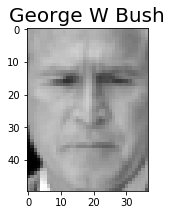

In [9]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

def print_face(i):
    image = df.iloc[i, :-2].astype('float').values
    name = df.iloc[i, -2]
    
    plt.figure(figsize=(4,3))
    plt.imshow(np.reshape(image, (50,37)), cmap=plt.cm.gray)
    plt.title(name, fontsize = 20)

print_face(122)